## 🟤 7. Multivariate & Dimensionality Techniques

### 7.1. Principal Component Analysis (PCA)

**Explanation:**
Principal Component Analysis (PCA) is a widely used **dimensionality reduction technique**. Its main goal is to transform a large set of correlated variables into a smaller set of uncorrelated variables called **Principal Components (PCs)**. These new components capture the most variance in the data. The first PC captures the most variance, the second PC captures the second most variance (and is orthogonal to the first), and so on.

**Purpose:**

  * **Dimensionality Reduction:** Reduce the number of features while retaining most of the information.
  * **Noise Reduction:** By focusing on major components, less important variance (noise) is often discarded.
  * **Data Visualization:** It can reduce high-dimensional data to 2 or 3 dimensions for easier plotting and interpretation.
  * **Feature Engineering:** The PCs can be used as new features for other machine learning models.

**Mathematical Intuition:**
PCA essentially finds the directions (or axes) along which the data varies the most. These directions are the eigenvectors of the covariance matrix of your data.

1.  **Covariance Matrix:**

      * The covariance matrix is a square matrix that describes the variance of each variable and the covariance between each pair of variables.
      * For a dataset with $p$ features, the covariance matrix $\\Sigma$ will be $p \\times p$.
      * Each diagonal element $\\Sigma\_{ii}$ is the variance of feature $i$.
      * Each off-diagonal element $\\Sigma\_{ij}$ is the covariance between feature $i$ and feature $j$.
      * A high positive covariance indicates that two variables tend to increase or decrease together. A high negative covariance indicates that as one increases, the other tends to decrease.

    *Example for 2 variables ($X\_1, X\_2$):*
    $$\Sigma = \begin{pmatrix} \text{Var}(X_1) & \text{Cov}(X_1, X_2) \\ \text{Cov}(X_2, X_1) & \text{Var}(X_2) \end{pmatrix}$$

2.  **Eigenvalues and Eigenvectors:**

      * **Eigenvectors:** These are special vectors that, when a linear transformation (like multiplying by the covariance matrix) is applied to them, only change by a scalar factor. In PCA, eigenvectors represent the **principal components**, which are the directions of maximum variance in the data. They are orthogonal (at right angles) to each other.
      * **Eigenvalues:** The scalar factor by which an eigenvector is scaled is its corresponding eigenvalue. In PCA, eigenvalues represent the **amount of variance** explained by each principal component. A larger eigenvalue means its corresponding eigenvector captures more variance in the data.

    The core mathematical problem of PCA is to find the eigenvalues $\\lambda$ and eigenvectors $\\mathbf{v}$ for a covariance matrix $\\Sigma$ such that:
    $$\Sigma \mathbf{v} = \lambda \mathbf{v}$$

3.  **Steps of PCA:**

    1.  **Standardize the Data:** (Optional but recommended) If variables have different scales, standardize them to have zero mean and unit variance. This prevents variables with larger scales from dominating the principal components.
    2.  **Compute the Covariance Matrix:** Calculate the covariance matrix of the standardized data.
    3.  **Calculate Eigenvalues and Eigenvectors:** Perform eigen decomposition on the covariance matrix.
    4.  **Sort Eigenvalues:** Order the eigenvalues from largest to smallest. The corresponding eigenvectors are the principal components, ordered by the amount of variance they explain.
    5.  **Select Principal Components:** Choose a subset of principal components (eigenvectors) corresponding to the largest eigenvalues. You can decide based on:
          * A fixed number of components (e.g., 2 for visualization).
          * A cumulative explained variance threshold (e.g., components explaining 95% of variance).
          * A Scree Plot (see below).
    6.  **Transform Data:** Project the original data onto the selected principal components to get the new, lower-dimensional representation.

**Scree Plot:**
A Scree plot is a line plot of the eigenvalues (or explained variance) of principal components in descending order. It helps to determine the "optimal" number of components to retain. You typically look for an "elbow" point where the slope of the line dramatically changes, suggesting that components after this point contribute much less to explaining variance.

**Problem Statement:**

  * **Problem:** A retail company has collected data on 10 different customer engagement metrics (e.g., website visits, average time on site, number of purchases, items viewed, newsletter clicks, etc.). They want to understand the underlying patterns of customer engagement and reduce the dimensionality of this data to build a simpler customer segmentation model, as having 10 features is complex for visualization and modeling.
  * **PCA Application:** PCA can identify the few principal components that capture most of the variation in these 10 metrics. For example, PC1 might represent "overall activity" and PC2 "engagement with promotions," simplifying the data for clustering or visualization.

<!-- end list -->



--- 7.1. Principal Component Analysis (PCA) ---
Original Data Head:
    Metric_A   Metric_B   Metric_C   Metric_D   Metric_E
0  54.967142  36.896860  32.862299  16.401399  50.866868
1  48.617357  36.790659  34.486276  18.451042  62.807500
2  56.476885  43.467936  38.664410  26.187820  70.062924
3  65.230299  48.172853  38.430416  25.499731  70.563767
4  47.658466  37.320344  18.978645  11.303581  64.599214

Original Data Covariance Matrix:
           Metric_A   Metric_B   Metric_C   Metric_D    Metric_E
Metric_A  82.476989  60.073882  15.033780   3.553174  -15.787590
Metric_B  60.073882  66.070050  10.511866   1.636443   -1.018250
Metric_C  15.033780  10.511866  75.242840  45.137757  -11.745841
Metric_D   3.553174   1.636443  45.137757  39.584051    2.624194
Metric_E -15.787590  -1.018250 -11.745841   2.624194  162.939196

Explained Variance Ratio by each Principal Component: [0.41092429 0.32234883 0.20078359 0.03528015 0.03066314]
Cumulative Explained Variance: [0.41092429 0.73327312 

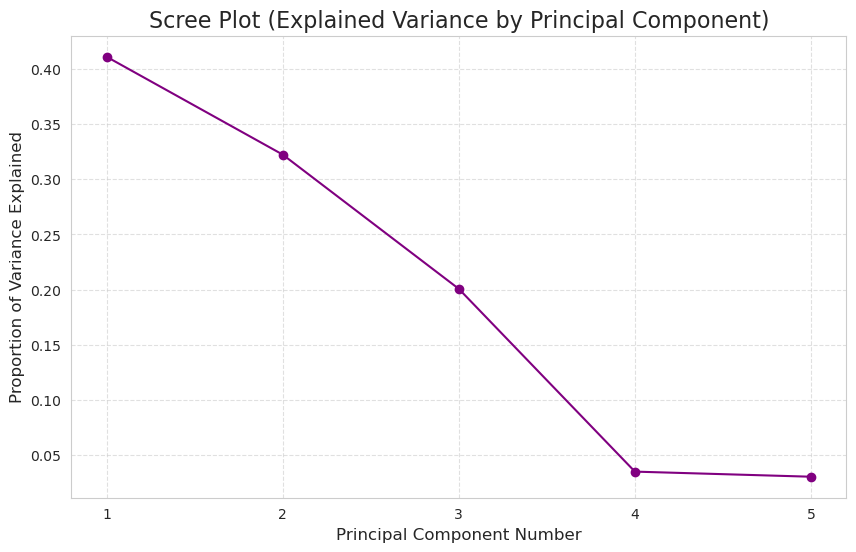

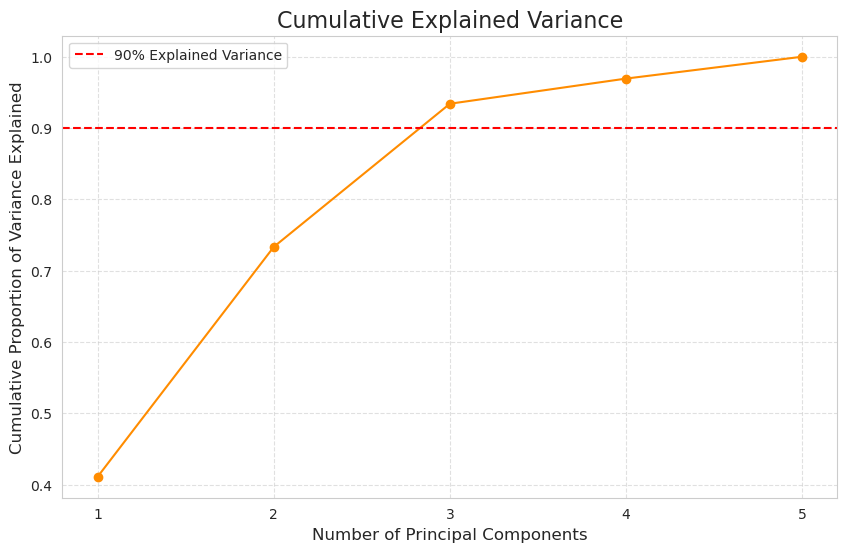


Transformed Data (First 2 Principal Components) Head:
   Principal Component 1  Principal Component 2
0               0.329634              -0.347166
1               0.110852               0.325155
2               1.715961               0.431588
3               2.423823              -0.396480
4              -1.404664              -1.100460


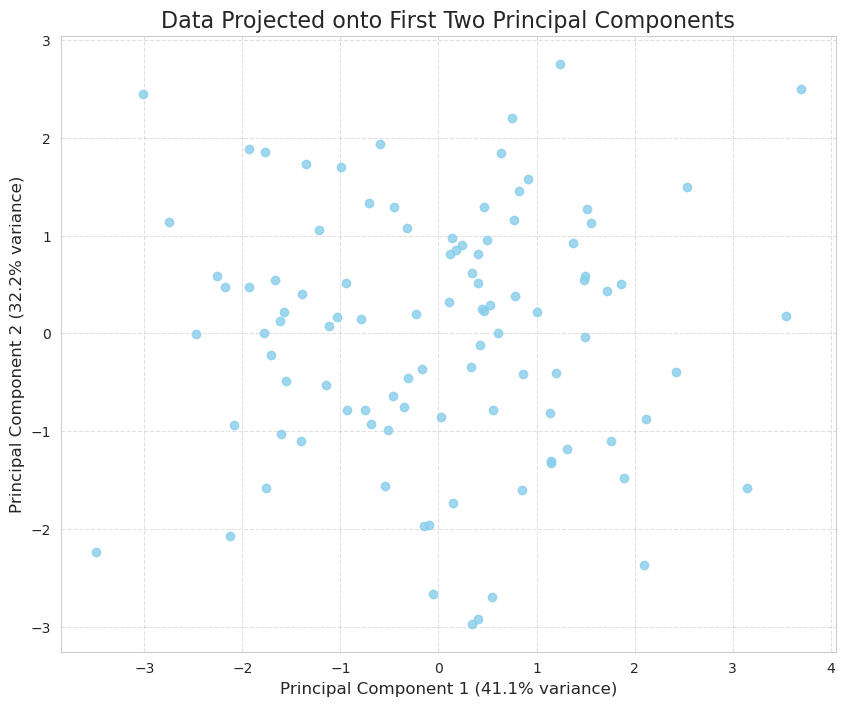


Eigenvectors (Loadings) for the first 2 Principal Components:
               PC1       PC2
Metric_A  0.511123 -0.481480
Metric_B  0.484428 -0.500822
Metric_C  0.531243  0.459490
Metric_D  0.458059  0.549556
Metric_E -0.109755  0.064897


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

sns.set_style("whitegrid")
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['DejaVu Sans'] # Or your preferred sans-serif font

print("--- 7.1. Principal Component Analysis (PCA) ---")

# 1. Simulate some correlated data (e.g., customer metrics)
np.random.seed(42)
data_size = 100
# High correlation between feature1 and feature2
feature1 = np.random.normal(50, 10, data_size)
feature2 = feature1 * 0.8 + np.random.normal(0, 5, data_size)
feature3 = np.random.normal(30, 8, data_size)
feature4 = feature3 * 0.6 + np.random.normal(0, 4, data_size)
feature5 = np.random.normal(70, 12, data_size) # Less correlated

df_pca = pd.DataFrame({
    'Metric_A': feature1,
    'Metric_B': feature2,
    'Metric_C': feature3,
    'Metric_D': feature4,
    'Metric_E': feature5
})

print("Original Data Head:")
print(df_pca.head())
print("\nOriginal Data Covariance Matrix:")
print(df_pca.cov())

# 2. Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_pca)
scaled_df = pd.DataFrame(scaled_data, columns=df_pca.columns)

# 3. Perform PCA
pca = PCA(n_components=None) # Keep all components initially
pca.fit(scaled_data)

# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
print(f"\nExplained Variance Ratio by each Principal Component: {explained_variance_ratio}")
print(f"Cumulative Explained Variance: {np.cumsum(explained_variance_ratio)}")

# Plotting: Scree Plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', linestyle='-', color='purple')
plt.title('Scree Plot (Explained Variance by Principal Component)', fontsize=16)
plt.xlabel('Principal Component Number', fontsize=12)
plt.ylabel('Proportion of Variance Explained', fontsize=12)
plt.xticks(range(1, len(explained_variance_ratio) + 1))
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# Plotting: Cumulative Explained Variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), np.cumsum(explained_variance_ratio), marker='o', linestyle='-', color='darkorange')
plt.axhline(y=0.90, color='r', linestyle='--', label='90% Explained Variance')
plt.title('Cumulative Explained Variance', fontsize=16)
plt.xlabel('Number of Principal Components', fontsize=12)
plt.ylabel('Cumulative Proportion of Variance Explained', fontsize=12)
plt.xticks(range(1, len(explained_variance_ratio) + 1))
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.show()

# Project data onto the first 2 principal components for visualization
pca_2d = PCA(n_components=2)
principal_components = pca_2d.fit_transform(scaled_data)
df_pca_2d = pd.DataFrame(data=principal_components, columns=['Principal Component 1', 'Principal Component 2'])

print("\nTransformed Data (First 2 Principal Components) Head:")
print(df_pca_2d.head())

plt.figure(figsize=(10, 8))
plt.scatter(df_pca_2d['Principal Component 1'], df_pca_2d['Principal Component 2'], alpha=0.8, color='skyblue')
plt.title('Data Projected onto First Two Principal Components', fontsize=16)
plt.xlabel(f'Principal Component 1 ({explained_variance_ratio[0]*100:.1f}% variance)', fontsize=12)
plt.ylabel(f'Principal Component 2 ({explained_variance_ratio[1]*100:.1f}% variance)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# Display Eigenvectors (Loadings) for the first two components
print("\nEigenvectors (Loadings) for the first 2 Principal Components:")
print(pd.DataFrame(pca_2d.components_.T, columns=['PC1', 'PC2'], index=df_pca.columns))



-----

### 7.2. Factor Analysis

**Explanation:**
Factor Analysis (FA) is a statistical method used to describe variability among observed, correlated variables in terms of a potentially lower number of unobserved variables called **factors** (or latent variables). Unlike PCA, which is primarily a data reduction technique that doesn't make strong assumptions about an underlying causal structure, Factor Analysis **assumes that the observed variables are caused by underlying latent factors**. It seeks to identify these common factors.

**Key Concepts:**

  * **Latent Variable Modeling:** The core idea is that observed variables (e.g., answers to survey questions, test scores) are manifestations of underlying, unobserved (latent) constructs or factors (e.g., "Intelligence," "Customer Satisfaction," "Personality Traits").
  * **Common Factors:** These are the unobserved variables that influence two or more observed variables.
  * **Unique Factors/Error:** The part of an observed variable's variance that is not explained by the common factors (it's specific to that variable or due to random error).
  * **Loadings:** These are the correlations between the observed variables and the common factors. They indicate how strongly each observed variable is related to each factor.

**Mathematical Intuition (Conceptual Model):**
Factor analysis models each observed variable as a linear combination of common factors and a unique factor:

For an observed variable $X\_i$:
$$X_i = L_{i1}F_1 + L_{i2}F_2 + \dots + L_{ik}F_k + U_i$$
Where:

  * $X\_i$: The $i$-th observed variable.
  * $L\_{ij}$: The **loading** of variable $X\_i$ on common factor $F\_j$. (This is like a regression coefficient of $X\_i$ on $F\_j$).
  * $F\_j$: The $j$-th common factor.
  * $U\_i$: The unique factor for variable $X\_i$ (representing specific variance and error).
  * $k$: The number of common factors.

The goal of Factor Analysis is to estimate these loadings ($L\_{ij}$) and the variance of the unique factors ($U\_i$) to infer the underlying factors. The method works by analyzing the correlations or covariances among the observed variables to find patterns that suggest common underlying causes.

**Problem Statement:**

  * **Problem:** A researcher has administered a questionnaire to students, asking them to rate their agreement (on a scale of 1-5) with 15 statements related to their study habits and academic attitudes. The researcher believes that these 15 statements actually measure a smaller number of underlying psychological constructs, such as "Self-Discipline," "Motivation for Learning," and "Stress Management." They want to identify and confirm these latent constructs.
  * **Factor Analysis Application:** Factor analysis can be used to determine if these 15 observed variables (survey responses) "load" onto a few distinct, underlying factors. For instance, statements like "I set clear study goals" and "I avoid distractions while studying" might load highly on a "Self-Discipline" factor.

<!-- end list -->



In [3]:
!pip install factor_analyzer

  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for factor_analyzer: filename=factor_analyzer-0.5.1-py2.py3-none-any.whl size=42715 sha256=350983c245b85bbc833205cc135a3fb3f9d16384b7799dd53c1d6c09dfe265a6
  Stored in directory: c:\users\sangouda\appdata\local\pip\cache\wheels\a2\af\06\f4d4ed4d9d714fda437fb1583629417319603c2266e7b233cc
Successfully built factor_analyzer



--- 7.2. Factor Analysis ---
Simulated Observed Variables Head:
   Q1_Vocab  Q2_Grammar  Q3_Reading   Q4_Math  Q5_Logic  Q6_ProblemSolving
0  1.336010    0.736596    0.253923  2.056413  1.728196           2.071967
1 -0.163200    0.010937   -1.936023  0.325029 -1.091281           0.612893
2 -0.075751   -0.997274   -0.110100 -0.098367 -0.433536          -1.719764
3 -1.111375   -1.639419   -0.298438 -0.932929 -1.456312          -0.182500
4  0.269268    1.266365    1.188081 -0.065314 -0.397982          -1.602509

Correlation Matrix of Observed Variables:
                   Q1_Vocab  Q2_Grammar  Q3_Reading   Q4_Math  Q5_Logic  \
Q1_Vocab           1.000000    0.645038    0.609422  0.240305  0.254419   
Q2_Grammar         0.645038    1.000000    0.493108  0.358252  0.379122   
Q3_Reading         0.609422    0.493108    1.000000  0.194117  0.247480   
Q4_Math            0.240305    0.358252    0.194117  1.000000  0.621763   
Q5_Logic           0.254419    0.379122    0.247480  0.621763  1.00

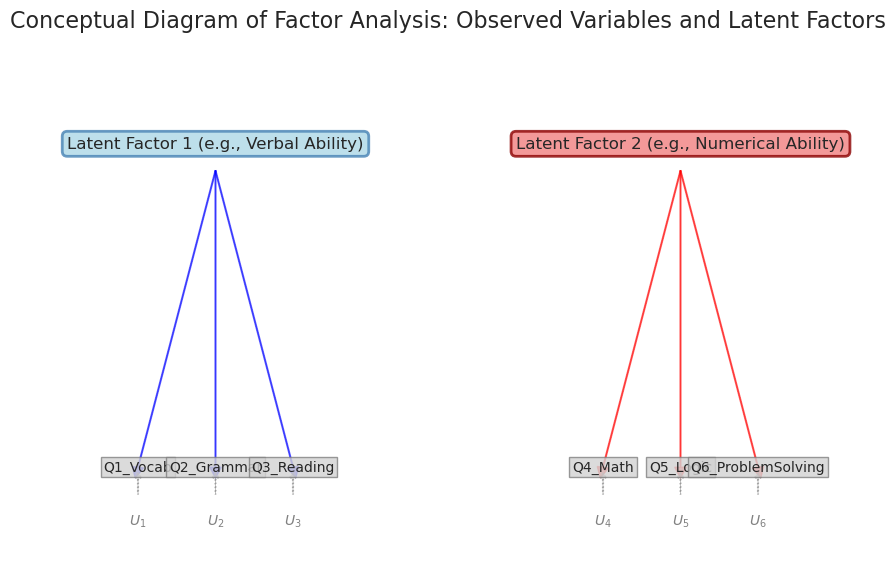

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from factor_analyzer import FactorAnalyzer # You might need to install: pip install factor_analyzer

sns.set_style("whitegrid")
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['DejaVu Sans']

print("\n--- 7.2. Factor Analysis ---")

# Simulate data for 6 observed variables (e.g., test scores or survey items)
# Assume 2 underlying latent factors
np.random.seed(43)
num_samples = 200

# Latent factors
factor1 = np.random.normal(0, 1, num_samples) # e.g., 'Verbal Ability'
factor2 = np.random.normal(0, 1, num_samples) # e.g., 'Numerical Ability'

# Observed variables (each influenced by factors + unique error)
# High loadings on Factor 1
var1 = 0.8 * factor1 + 0.1 * factor2 + np.random.normal(0, 0.5, num_samples)
var2 = 0.7 * factor1 + 0.2 * factor2 + np.random.normal(0, 0.6, num_samples)
var3 = 0.6 * factor1 + 0.1 * factor2 + np.random.normal(0, 0.7, num_samples)

# High loadings on Factor 2
var4 = 0.1 * factor1 + 0.8 * factor2 + np.random.normal(0, 0.5, num_samples)
var5 = 0.2 * factor1 + 0.7 * factor2 + np.random.normal(0, 0.6, num_samples)
var6 = 0.1 * factor1 + 0.6 * factor2 + np.random.normal(0, 0.7, num_samples)

df_fa = pd.DataFrame({
    'Q1_Vocab': var1, 'Q2_Grammar': var2, 'Q3_Reading': var3,
    'Q4_Math': var4, 'Q5_Logic': var5, 'Q6_ProblemSolving': var6
})

print("Simulated Observed Variables Head:")
print(df_fa.head())
print("\nCorrelation Matrix of Observed Variables:")
print(df_fa.corr()) # Notice the correlation patterns within presumed factors

# Standardize the data
scaler_fa = StandardScaler()
scaled_data_fa = scaler_fa.fit_transform(df_fa)

# Perform Factor Analysis
# We'll try to extract 2 factors, corresponding to our simulation
fa = FactorAnalyzer(n_factors=2, rotation="varimax") # Varimax for orthogonal rotation
fa.fit(scaled_data_fa)

# Get factor loadings
loadings = fa.loadings_
print("\nFactor Loadings Matrix:")
loadings_df = pd.DataFrame(loadings, index=df_fa.columns, columns=[f'Factor {i+1}' for i in range(loadings.shape[1])])
print(loadings_df)

# Get explained variance (eigenvalues)
ev, v = fa.get_eigenvalues()
print("\nEigenvalues (Variance explained by each factor):")
print(ev)

# --- Conceptual Plot of Latent Variable Modeling ---
plt.figure(figsize=(10, 7))
ax = plt.gca()

# Draw latent factors
ax.text(0.2, 0.8, 'Latent Factor 1 (e.g., Verbal Ability)', bbox=dict(boxstyle="round,pad=0.3", fc="lightblue", ec="steelblue", lw=2, alpha=0.8), ha='center', va='center', fontsize=12)
ax.text(0.8, 0.8, 'Latent Factor 2 (e.g., Numerical Ability)', bbox=dict(boxstyle="round,pad=0.3", fc="lightcoral", ec="darkred", lw=2, alpha=0.8), ha='center', va='center', fontsize=12)

# Draw observed variables
obs_vars_pos = {
    'Q1_Vocab': (0.1, 0.2), 'Q2_Grammar': (0.2, 0.2), 'Q3_Reading': (0.3, 0.2),
    'Q4_Math': (0.7, 0.2), 'Q5_Logic': (0.8, 0.2), 'Q6_ProblemSolving': (0.9, 0.2)
}
for i, (var_name, pos) in enumerate(obs_vars_pos.items()):
    ax.text(pos[0], pos[1], var_name, bbox=dict(boxstyle="square,pad=0.2", fc="lightgrey", ec="gray", lw=1, alpha=0.8), ha='center', va='center', fontsize=10)

# Draw arrows (loadings) from factors to observed variables
# Factor 1 to Q1, Q2, Q3
for var_name in ['Q1_Vocab', 'Q2_Grammar', 'Q3_Reading']:
    ax.arrow(0.2, 0.75, obs_vars_pos[var_name][0] - 0.2, obs_vars_pos[var_name][1] - 0.75,
             head_width=0.015, head_length=0.02, fc='blue', ec='blue', alpha=0.6)

# Factor 2 to Q4, Q5, Q6
for var_name in ['Q4_Math', 'Q5_Logic', 'Q6_ProblemSolving']:
    ax.arrow(0.8, 0.75, obs_vars_pos[var_name][0] - 0.8, obs_vars_pos[var_name][1] - 0.75,
             head_width=0.015, head_length=0.02, fc='red', ec='red', alpha=0.6)

# Draw unique factors (errors)
for i, (var_name, pos) in enumerate(obs_vars_pos.items()):
    ax.text(pos[0], pos[1] - 0.1, r'$U_{%d}$' % (i+1), ha='center', va='center', fontsize=10, color='gray')
    ax.arrow(pos[0], pos[1] - 0.05, 0, 0.03, head_width=0.01, head_length=0.01, fc='gray', ec='gray', ls=':', alpha=0.6)


ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.axis('off') # Hide axes
ax.set_title('Conceptual Diagram of Factor Analysis: Observed Variables and Latent Factors', fontsize=16)
plt.show()



-----

### 7.3. MANOVA (Multivariate ANOVA)

**Explanation:**
MANOVA (Multivariate Analysis of Variance) is an extension of the univariate ANOVA. While ANOVA tests for differences in means between groups for a *single* dependent variable, MANOVA tests for differences in means between groups for *two or more* dependent variables simultaneously.

It assesses whether the group means differ significantly across a **combination** of dependent variables. In essence, it checks if the groups created by one or more categorical independent variables (factors) have different mean vectors (comprising the dependent variables).

**Purpose:**

  * To determine if there are statistically significant differences between group centroids (multivariate means) across multiple dependent variables.
  * To control for Type I error inflation that would occur if multiple separate ANOVAs were performed on each dependent variable.
  * To identify which specific dependent variables contribute most to the significant group differences (often followed by post-hoc univariate ANOVAs if MANOVA is significant).

**Mathematical Intuition:**
Instead of comparing univariate means, MANOVA compares **mean vectors** of dependent variables across groups. It examines the variance-covariance matrices of the dependent variables.

The core idea is to partition the total variance-covariance matrix (T) into two components:

1.  **Between-group variance-covariance matrix (H):** Variance explained by the group differences.
2.  **Within-group variance-covariance matrix (E):** Residual variance (error).

MANOVA test statistics are derived from the relationship between H and E. Common test statistics include:

  * **Wilks' Lambda ($\\Lambda$):** The most common. It's the ratio of the determinant of the error matrix (E) to the determinant of the total matrix (T = H + E). A smaller $\\Lambda$ indicates greater group differences.
    $$\Lambda = \frac{\det(\mathbf{E})}{\det(\mathbf{H} + \mathbf{E})}$$
    (Where $\\det$ is the determinant of a matrix).
  * **Pillai's Trace, Hotelling's T-squared, Roy's Largest Root:** Other common statistics, each with slightly different interpretations and robustness properties.

The significance of these statistics is evaluated using an F-distribution approximation.

**Problem Statement:**

  * **Problem:** A university wants to evaluate the effectiveness of three different teaching methods (Method A, Method B, Method C) on student performance. They measure student performance using scores on three different subjects: Mathematics, English, and Science. They want to know if there's a significant difference in overall academic performance (considering all three subjects simultaneously) among the students taught by these three methods.
  * **MANOVA Application:** MANOVA would be used to test if the mean vectors of (Math score, English score, Science score) differ significantly across the three teaching methods. If the MANOVA is significant, it suggests that the teaching methods have a differential impact on the combined set of academic scores.

<!-- end list -->



--- 7.3. MANOVA (Multivariate ANOVA) ---
Simulated MANOVA Data Head:
   Math_Score  English_Score  Science_Score Teaching_Method
0   63.995082      82.410185      81.943073        Method A
1   80.530859      85.117363      62.191609        Method A
2   79.969120      75.341763      75.914043        Method A
3   57.160674      75.632307      65.134563        Method A
4   58.254851      71.638202      74.546221        Method A

Mean Scores by Teaching Method:
                 Math_Score  English_Score  Science_Score
Teaching_Method                                          
Method A          69.105127      74.527125      68.228416
Method B          74.501611      79.989820      71.956995
Method C          82.438607      86.176013      79.097486

MANOVA Test Results (Wilks' Lambda, Pillai's Trace, Hotelling-Lawley, Roy's Greatest Root):
                   Multivariate linear model
                                                                
--------------------------------------------

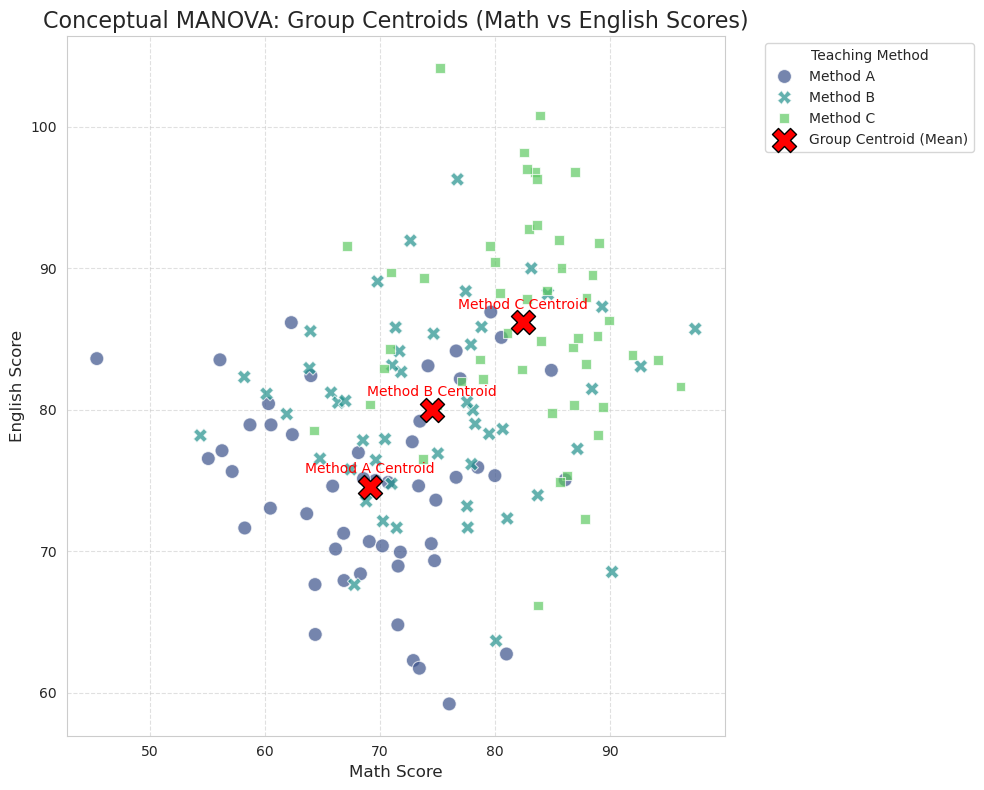

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.multivariate.manova import MANOVA # You might need to install statsmodels

sns.set_style("whitegrid")
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['DejaVu Sans']

print("\n--- 7.3. MANOVA (Multivariate ANOVA) ---")

# Simulate data for 3 groups (teaching methods) and 3 dependent variables (scores)
np.random.seed(44)
n_per_group = 50

# Group A (e.g., Traditional Method)
math_A = np.random.normal(70, 8, n_per_group)
english_A = np.random.normal(75, 7, n_per_group)
science_A = np.random.normal(68, 9, n_per_group)
group_A_label = ['Method A'] * n_per_group

# Group B (e.g., Interactive Method) - slightly higher means
math_B = np.random.normal(75, 8, n_per_group)
english_B = np.random.normal(80, 7, n_per_group)
science_B = np.random.normal(73, 9, n_per_group)
group_B_label = ['Method B'] * n_per_group

# Group C (e.g., Project-Based Method) - even higher means
math_C = np.random.normal(80, 8, n_per_group)
english_C = np.random.normal(85, 7, n_per_group)
science_C = np.random.normal(78, 9, n_per_group)
group_C_label = ['Method C'] * n_per_group

# Combine into a DataFrame
data_manova = pd.DataFrame({
    'Math_Score': np.concatenate([math_A, math_B, math_C]),
    'English_Score': np.concatenate([english_A, english_B, english_C]),
    'Science_Score': np.concatenate([science_A, science_B, science_C]),
    'Teaching_Method': np.concatenate([group_A_label, group_B_label, group_C_label])
})

print("Simulated MANOVA Data Head:")
print(data_manova.head())
print("\nMean Scores by Teaching Method:")
print(data_manova.groupby('Teaching_Method').mean())

# Perform MANOVA
# The formula specifies dependent variables ~ independent variable
formula = 'Math_Score + English_Score + Science_Score ~ C(Teaching_Method)'
manova_results = MANOVA.from_formula(formula, data=data_manova)

print("\nMANOVA Test Results (Wilks' Lambda, Pillai's Trace, Hotelling-Lawley, Roy's Greatest Root):")
print(manova_results.mv_test())


# --- Conceptual Plot: Multivariate Group Centroids ---
# For visualization, we'll project the 3D data into 2D using PCA if needed, or just show 2 variables.
# Let's visualize Math vs English scores by group.
plt.figure(figsize=(10, 8))
sns.scatterplot(
    data=data_manova,
    x='Math_Score',
    y='English_Score',
    hue='Teaching_Method',
    style='Teaching_Method',
    s=100, alpha=0.7,
    palette='viridis'
)

# Plot group centroids (means)
group_means = data_manova.groupby('Teaching_Method')[['Math_Score', 'English_Score']].mean()
plt.scatter(
    group_means['Math_Score'],
    group_means['English_Score'],
    marker='X', s=300, color='red', edgecolor='black', zorder=5,
    label='Group Centroid (Mean)'
)

# Annotate centroids
for method, row in group_means.iterrows():
    plt.annotate(
        f'{method} Centroid',
        (row['Math_Score'], row['English_Score']),
        textcoords="offset points", xytext=(0,10), ha='center', fontsize=10, color='red'
    )

plt.title('Conceptual MANOVA: Group Centroids (Math vs English Scores)', fontsize=16)
plt.xlabel('Math Score', fontsize=12)
plt.ylabel('English Score', fontsize=12)
plt.legend(title='Teaching Method', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# You could also try a 3D plot for all three if you have libraries that support it well
# from mpl_toolkits.mplot3d import Axes3D
# fig = plt.figure(figsize=(12, 10))
# ax = fig.add_subplot(111, projection='3d')
# ax.scatter(data_manova['Math_Score'], data_manova['English_Score'], data_manova['Science_Score'],
#            c=data_manova['Teaching_Method'].map({'Method A': 'red', 'Method B': 'green', 'Method C': 'blue'}),
#            s=50, alpha=0.7)
# ax.set_xlabel('Math Score')
# ax.set_ylabel('English Score')
# ax.set_zlabel('Science Score')
# ax.set_title('3D Scatter Plot of Scores by Teaching Method')
# plt.show()



-----

### 7.4. Cluster Analysis

**Explanation:**
Cluster analysis is an **unsupervised machine learning technique** used to group a set of objects in such a way that objects in the same group (called a cluster) are more similar to each other than to those in other groups (clusters). It's "unsupervised" because it doesn't rely on pre-labeled categories.

**Purpose:**

  * **Customer Segmentation:** Grouping customers with similar purchasing behaviors or demographics.
  * **Market Research:** Identifying distinct market segments.
  * **Biology:** Classifying species or genes based on shared characteristics.
  * **Image Segmentation:** Grouping similar pixels.
  * **Anomaly Detection:** Identifying outliers as single-point clusters or points far from any cluster.

**Mathematical Intuition & Models:**

#### 7.4.1. K-means Clustering

  * **Concept:** K-means is a centroid-based clustering algorithm. It aims to partition $n$ observations into $k$ clusters, where each observation belongs to the cluster with the nearest mean (centroid).
  * **Algorithm Steps:**
    1.  **Initialization:** Randomly select $k$ data points from the dataset as initial cluster centroids.
    2.  **Assignment Step:** Assign each data point to the cluster whose centroid is closest (e.g., using Euclidean distance).
    3.  **Update Step:** Recalculate the centroids of the new clusters as the mean of all data points assigned to that cluster.
    4.  **Iteration:** Repeat steps 2 and 3 until cluster assignments no longer change or a maximum number of iterations is reached.
  * **Optimization:** K-means minimizes the **Within-Cluster Sum of Squares (WCSS)**, also known as inertia.
    $$\text{WCSS} = \sum_{i=1}^{k} \sum_{x \in C_i} ||x - \mu_i||^2$$
    Where $C\_i$ is the $i$-th cluster, and $\\mu\_i$ is the centroid of cluster $C\_i$.

**Problem Statement (K-means):**

  * **Problem:** An e-commerce company wants to segment its customer base to tailor marketing campaigns. They have data on two key metrics for each customer: "Average Monthly Spend" and "Number of Website Visits per Month." They believe there are 3 distinct customer groups.
  * **K-means Application:** K-means can be used to group these customers into 3 clusters based on their spend and visits, allowing the company to identify segments like "High-Value Engaged," "Low-Value Engaged," and "High-Value Infrequent."

#### 7.4.2. Hierarchical Clustering

  * **Concept:** Hierarchical clustering builds a hierarchy of clusters. It can be:
      * **Agglomerative (Bottom-Up):** Starts with each data point as its own cluster, then iteratively merges the closest clusters until all points are in a single cluster or a stopping criterion is met.
      * **Divisive (Top-Down):** Starts with all data points in one cluster, then recursively splits clusters until each point is its own cluster. (Agglomerative is more common).
  * **Linkage Criteria:** How the "distance" between two clusters is measured:
      * **Single Linkage:** Minimum distance between any two points in the two clusters.
      * **Complete Linkage:** Maximum distance between any two points in the two clusters.
      * **Average Linkage:** Average distance between all pairs of points in the two clusters.
      * **Ward's Method:** Minimizes the total within-cluster variance when merging two clusters. Generally preferred.
  * **Dendrogram:** The output of hierarchical clustering is a tree-like diagram called a dendrogram. It shows the sequence of merges or splits and the distances at which they occurred. You can "cut" the dendrogram at a certain height to obtain a desired number of clusters.

**Problem Statement (Hierarchical):**

  * **Problem:** A biologist has genetic data for 20 different species and wants to understand their evolutionary relationships by grouping similar species based on their genetic markers, without pre-defining the number of groups.
  * **Hierarchical Clustering Application:** Hierarchical clustering can be used to build a dendrogram illustrating the genetic similarity hierarchy. The biologist can then observe natural groupings by cutting the dendrogram at different similarity thresholds.

#### 7.4.3. Silhouette Score

  * **Concept:** The Silhouette Score is a metric used to evaluate the quality of clustering results. It quantifies how similar an object is to its own cluster (cohesion) compared to other clusters (separation).
  * **Calculation:** For each data point $i$:
      * $a(i)$: The average distance between $i$ and all other data points in the *same cluster*. (Measures cohesion)
      * $b(i)$: The minimum average distance between $i$ and all data points in any *other cluster* that $i$ is not a part of. (Measures separation)
      * The Silhouette Coefficient for a single data point $i$ is:
        $$S(i) = \frac{b(i) - a(i)}{\max(a(i), b(i))}$$
  * **Interpretation:**
      * **Score range: -1 to +1.**
      * **+1:** Indicates that the data point is well-clustered, meaning it is far away from neighboring clusters.
      * **0:** Indicates that the data point is on or very close to the decision boundary between two neighboring clusters.
      * **-1:** Indicates that the data point might have been assigned to the wrong cluster.
  * **Overall Silhouette Score:** The average $S(i)$ over all data points. A higher overall score indicates better clustering. It's often used to determine the optimal number of clusters ($k$) by trying different $k$ values and picking the one with the highest silhouette score.

<!-- end list -->



--- 7.4. Cluster Analysis ---
Simulated Customer Data Head:
   Avg_Monthly_Spend  Website_Visits
0          20.131874        5.193008
1          21.301609        5.857532
2          18.024272        6.194667
3          18.978495        6.460173
4          13.641837        2.617078

--- K-means Clustering ---


c:\Users\sangouda\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


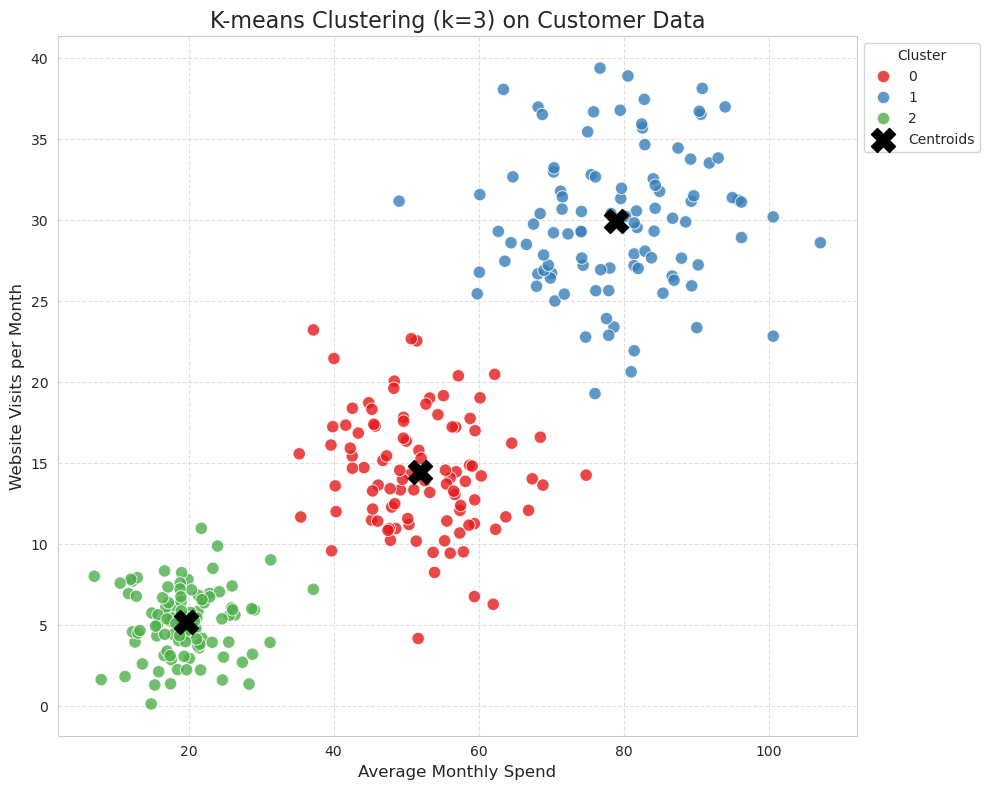


K-means Cluster Centroids (Original Scale):
   Avg_Monthly_Spend  Website_Visits
0          51.924215       14.436903
1          78.953817       29.937641
2          19.597540        5.209258

--- Hierarchical Clustering ---


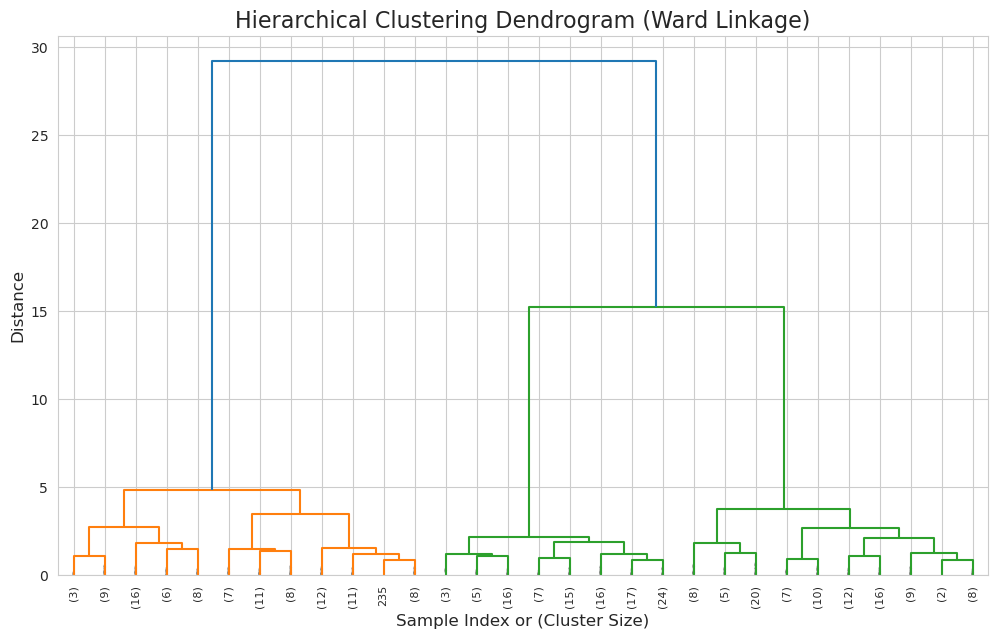

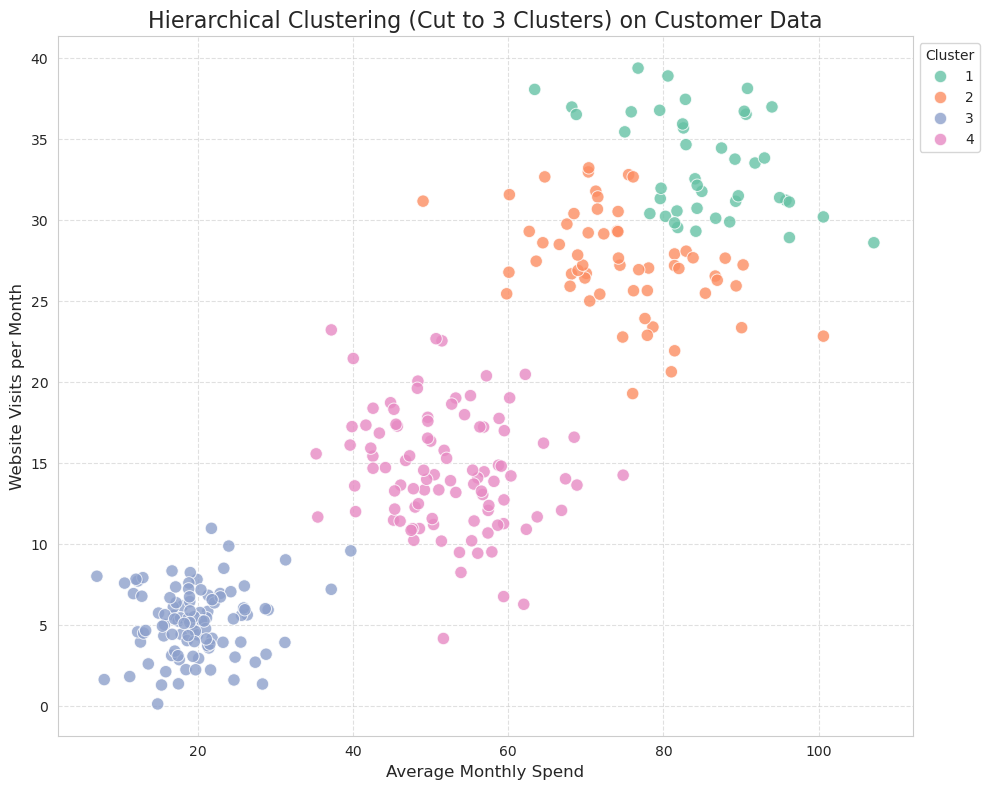


--- Silhouette Score ---
Silhouette Score for K-means (k=3): 0.660


c:\Users\sangouda\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\sangouda\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\sangouda\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\sangouda\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.p

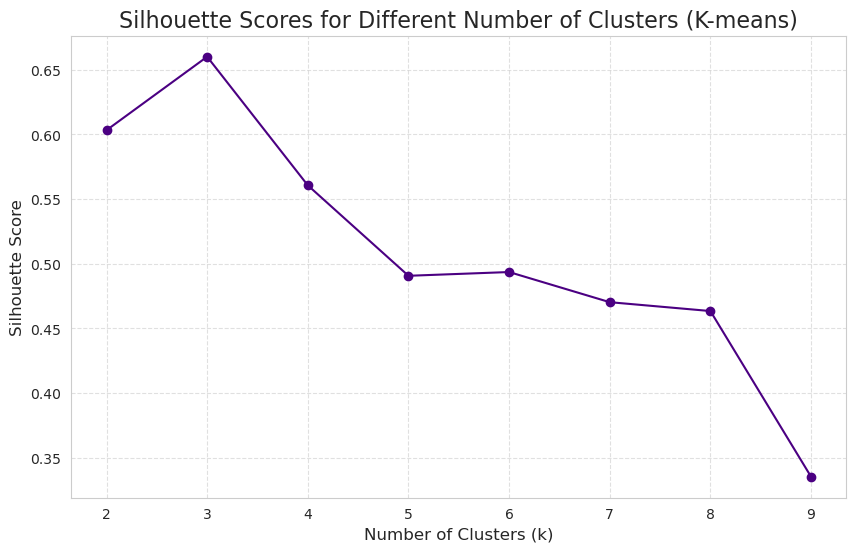

Optimal number of clusters (k) based on Silhouette Score: 3


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage

sns.set_style("whitegrid")
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['DejaVu Sans']

print("\n--- 7.4. Cluster Analysis ---")

# Simulate customer data for clustering (Avg Monthly Spend, Website Visits)
np.random.seed(45)
n_samples = 300
X_cluster = np.zeros((n_samples, 2))

# Create 3 distinct "true" clusters
# Cluster 1 (Low Spend, Low Visits)
X_cluster[:100, 0] = np.random.normal(20, 5, 100)
X_cluster[:100, 1] = np.random.normal(5, 2, 100)
# Cluster 2 (Medium Spend, Medium Visits)
X_cluster[100:200, 0] = np.random.normal(50, 8, 100)
X_cluster[100:200, 1] = np.random.normal(15, 4, 100)
# Cluster 3 (High Spend, High Visits)
X_cluster[200:, 0] = np.random.normal(80, 10, 100)
X_cluster[200:, 1] = np.random.normal(30, 5, 100)

df_cluster = pd.DataFrame(X_cluster, columns=['Avg_Monthly_Spend', 'Website_Visits'])

print("Simulated Customer Data Head:")
print(df_cluster.head())

# Standardize the data for clustering (especially K-means sensitive to scale)
scaler_cluster = StandardScaler()
scaled_data_cluster = scaler_cluster.fit_transform(df_cluster)


# --- 7.4.1. K-means Clustering ---
print("\n--- K-means Clustering ---")

# Try K-means with k=3
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10) # n_init for robust initialization
kmeans.fit(scaled_data_cluster)
cluster_labels_kmeans = kmeans.labels_
centroids = scaler_cluster.inverse_transform(kmeans.cluster_centers_) # Inverse transform centroids for original scale

df_cluster['KMeans_Cluster'] = cluster_labels_kmeans

plt.figure(figsize=(10, 8))
sns.scatterplot(
    data=df_cluster,
    x='Avg_Monthly_Spend',
    y='Website_Visits',
    hue='KMeans_Cluster',
    palette='Set1',
    s=80, alpha=0.8
)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', s=300, color='black', label='Centroids', zorder=5)
plt.title('K-means Clustering (k=3) on Customer Data', fontsize=16)
plt.xlabel('Average Monthly Spend', fontsize=12)
plt.ylabel('Website Visits per Month', fontsize=12)
plt.legend(title='Cluster', loc='upper left', bbox_to_anchor=(1,1))
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

print("\nK-means Cluster Centroids (Original Scale):")
print(pd.DataFrame(centroids, columns=['Avg_Monthly_Spend', 'Website_Visits']))


# --- 7.4.2. Hierarchical Clustering ---
print("\n--- Hierarchical Clustering ---")

# Perform hierarchical clustering using Ward linkage
linked_data = linkage(scaled_data_cluster, method='ward')

plt.figure(figsize=(12, 7))
dendrogram(linked_data,
           truncate_mode='lastp',  # show only the last p merged clusters
           p=30,                   # show last 30 merges
           leaf_rotation=90.,
           leaf_font_size=8.,
           show_contracted=True # For larger datasets, this helps summarize
          )
plt.title('Hierarchical Clustering Dendrogram (Ward Linkage)', fontsize=16)
plt.xlabel('Sample Index or (Cluster Size)', fontsize=12)
plt.ylabel('Distance', fontsize=12)
plt.show()

# To get clusters from hierarchical clustering, you can cut the dendrogram
from scipy.cluster.hierarchy import fcluster
# Let's cut to get 3 clusters
max_d = 4.5 # Based on observation of the dendrogram (adjust this!)
clusters_hierarchical = fcluster(linked_data, max_d, criterion='distance')
# Or, to get a specific number of clusters (e.g., 3)
# clusters_hierarchical = fcluster(linked_data, 3, criterion='maxclust')

df_cluster['Hierarchical_Cluster'] = clusters_hierarchical

plt.figure(figsize=(10, 8))
sns.scatterplot(
    data=df_cluster,
    x='Avg_Monthly_Spend',
    y='Website_Visits',
    hue='Hierarchical_Cluster',
    palette='Set2',
    s=80, alpha=0.8
)
plt.title(f'Hierarchical Clustering (Cut to 3 Clusters) on Customer Data', fontsize=16)
plt.xlabel('Average Monthly Spend', fontsize=12)
plt.ylabel('Website Visits per Month', fontsize=12)
plt.legend(title='Cluster', loc='upper left', bbox_to_anchor=(1,1))
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


# --- 7.4.3. Silhouette Score ---
print("\n--- Silhouette Score ---")

# Calculate Silhouette Score for K-means with 3 clusters
silhouette_avg_kmeans = silhouette_score(scaled_data_cluster, cluster_labels_kmeans)
print(f"Silhouette Score for K-means (k=3): {silhouette_avg_kmeans:.3f}")

# Evaluate Silhouette Score for a range of k values to find optimal k
silhouette_scores = []
k_values = range(2, 10) # Test k from 2 to 9

for k in k_values:
    kmeans_temp = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans_temp.fit(scaled_data_cluster)
    score = silhouette_score(scaled_data_cluster, kmeans_temp.labels_)
    silhouette_scores.append(score)

plt.figure(figsize=(10, 6))
plt.plot(k_values, silhouette_scores, marker='o', linestyle='-', color='indigo')
plt.title('Silhouette Scores for Different Number of Clusters (K-means)', fontsize=16)
plt.xlabel('Number of Clusters (k)', fontsize=12)
plt.ylabel('Silhouette Score', fontsize=12)
plt.xticks(k_values)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

optimal_k = k_values[np.argmax(silhouette_scores)]
print(f"Optimal number of clusters (k) based on Silhouette Score: {optimal_k}")